In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('basics').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/19 22:09:23 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [18]:
file = 'diabetes_012_health_indicators_BRFSS2015.csv'
df = spark.read.csv(file, header=True, inferSchema=True)

In [19]:
df.printSchema()

root
 |-- Diabetes_012: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)



In [15]:
binary_cols = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck',
       'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
       'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
       'DiffWalk', 'Sex']
nominal_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age',
       'Education', 'Income']

In [20]:
df.describe(binary_cols[0:5]).show()
df.describe(binary_cols[5:10]).show()
df.describe(binary_cols[10:15]).show()
df.describe(nominal_cols[0:4]).show()
df.describe(nominal_cols[4:7]).show()

+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|summary|       Diabetes_012|             HighBP|           HighChol|          CholCheck|             Smoker|
+-------+-------------------+-------------------+-------------------+-------------------+-------------------+
|  count|             253680|             253680|             253680|             253680|             253680|
|   mean|0.29692131819615264| 0.4290011037527594| 0.4241209397666351| 0.9626695048880479|0.44316855881425415|
| stddev| 0.6981597284090991|0.49493446268990043|0.49420980465688596|0.18957075436272514| 0.4967606667785607|
|    min|                0.0|                0.0|                0.0|                0.0|                0.0|
|    max|                2.0|                1.0|                1.0|                1.0|                1.0|
+-------+-------------------+-------------------+-------------------+-------------------+-------------------+



+-------+-------------------+--------------------+------------------+-------------------+-------------------+
|summary|             Stroke|HeartDiseaseorAttack|      PhysActivity|             Fruits|            Veggies|
+-------+-------------------+--------------------+------------------+-------------------+-------------------+
|  count|             253680|              253680|            253680|             253680|             253680|
|   mean|0.04057079785556607| 0.09418558814254178|0.7565436770734784| 0.6342557552822453|  0.811419899085462|
| stddev| 0.1972940994001612|  0.2920873147507536|0.4291690433970471|0.48163918717043364|0.39117547168449085|
|    min|                0.0|                 0.0|               0.0|                0.0|                0.0|
|    max|                1.0|                 1.0|               1.0|                1.0|                1.0|
+-------+-------------------+--------------------+------------------+-------------------+-------------------+

+-------+

+-------+------------------+------------------+------------------+------------------+
|summary|               BMI|           GenHlth|          MentHlth|          PhysHlth|
+-------+------------------+------------------+------------------+------------------+
|  count|            253680|            253680|            253680|            253680|
|   mean|28.382363607694735|2.5113923052664773|3.1847721538946705|4.2420805739514345|
| stddev| 6.608694201406001| 1.068477362280392| 7.412846696196214| 8.717951307175158|
|    min|              12.0|               1.0|               0.0|               0.0|
|    max|              98.0|               5.0|              30.0|              30.0|
+-------+------------------+------------------+------------------+------------------+

+-------+------------------+------------------+-----------------+
|summary|               Age|         Education|           Income|
+-------+------------------+------------------+-----------------+
|  count|            253680

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In order to plot using seaborn and matplotlib, the dataframe needs to be transfered into pandas dataframe.

In [12]:

df = df.toPandas()
df_columns = df.columns
df_summary = df.describe().transpose()

In [7]:
df_summary

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


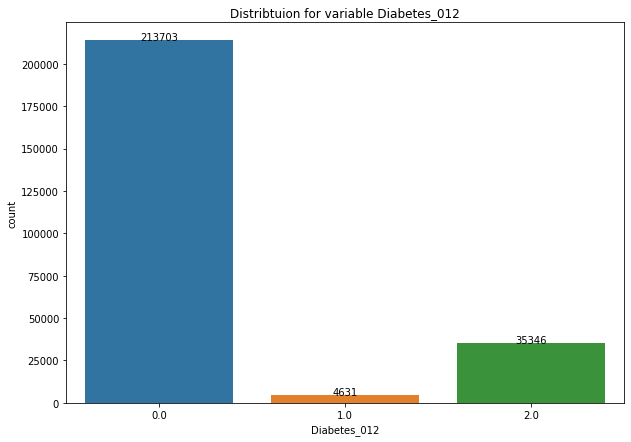

In [13]:
df = df.toPandas()
# Distribtuion for target variable Diabetes_012
fig, ax1 = plt.subplots(figsize=(10,7))
graph = sns.countplot(ax=ax1,x='Diabetes_012', data=df)
graph.set_title("Distribtuion for variable Diabetes_012")
graph.set_xticklabels(graph.get_xticklabels())
i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,
    df['Diabetes_012'].value_counts()[i],ha="center")
    i += 1

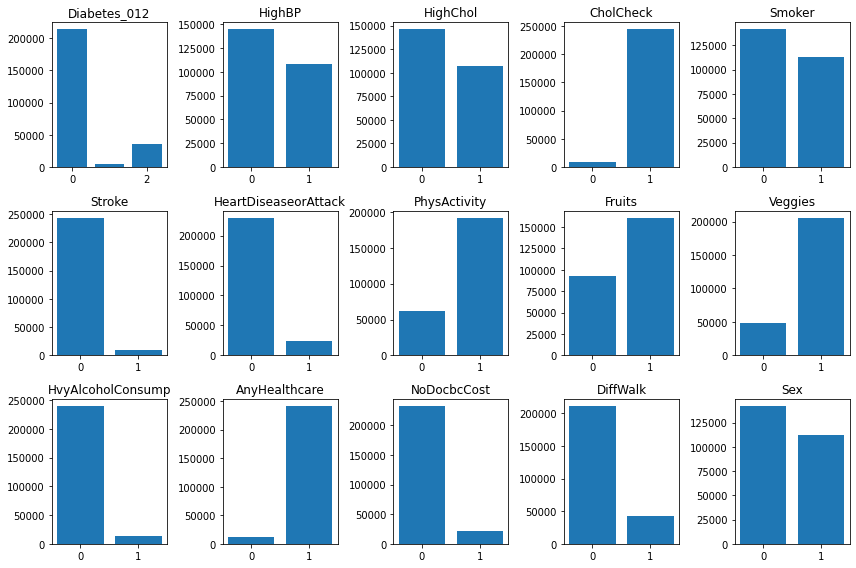

In [16]:
df_1 = df[binary_cols] # binary variables
# distribution plots for binary variables
fig, axs = plt.subplots(nrows=3, ncols=5,figsize=(12, 8))
a = axs.ravel()
df_1_columns = df_1.columns
for idx, ax in enumerate(a):
    ax.bar(df_1.iloc[:,idx].value_counts().keys().tolist(), df_1.iloc[:,idx].value_counts().tolist())
    ax.set_title(df_1_columns[idx])
plt.tight_layout()

In [ ]:
# Spark to Pandas
#df_pd = df.toPandas()

# Pandas to Spark
#df_sp = spark_session.createDataFrame(df_pd)

IndexError: single positional indexer is out-of-bounds

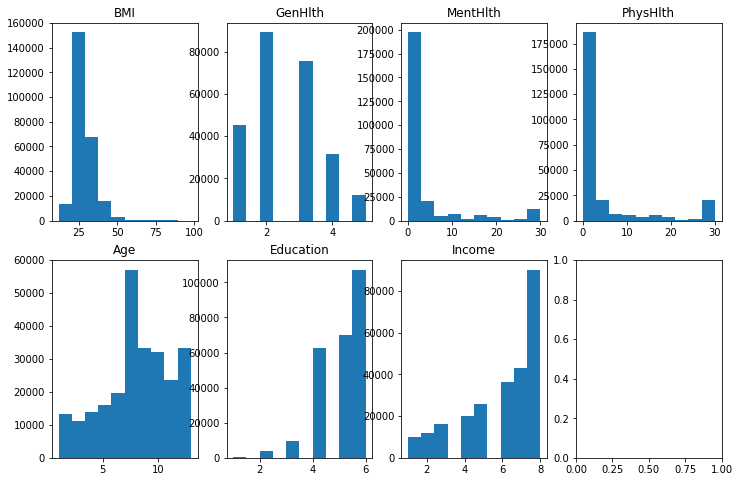

In [23]:
df = df.toPandas()
df_2 = df[nominal_cols] # nominal variables
# distribution for categorial varibles
f,a = plt.subplots(nrows=2,ncols=4, figsize=(12, 8))
a = a.ravel()
df_2_columns = df_2.columns
for idx,ax in enumerate(a):
    #print(idx)
    #print(df_2_columns[idx])
    ax.hist(df_2.iloc[:,idx])
    ax.set_title(df_2_columns[idx])
plt.tight_layout()